# Exploratory Data Analysis: Flight Delays (JFK)
In this notebook, we load the raw data from Airline_Delay_Cause.csv and perform initial data cleaning, filtering, and exploratory visualizations with an emphasis on JFK airport.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.dates as mdates
import numpy as np 
import matplotlib.ticker as ticker

In [55]:
# load raw data from past 21 years from BTS
df = pd.read_csv("../data/raw/raw data/Jan-Dec2024_BTS/Airline_Delay_Cause21.csv")
df.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,12,MQ,Envoy Air,EVV,"Evansville, IN: Evansville Regional",61.0,9.0,1.52,1.08,...,0.0,5.84,0.0,0.0,732.0,47.0,90.0,19.0,0.0,576.0
1,2024,12,MQ,Envoy Air,EWR,"Newark, NJ: Newark Liberty International",107.0,42.0,6.01,5.89,...,0.0,4.94,0.0,0.0,2531.0,335.0,491.0,1251.0,0.0,454.0
2,2024,12,MQ,Envoy Air,EYW,"Key West, FL: Key West International",169.0,31.0,3.37,0.71,...,0.0,15.48,5.0,3.0,1596.0,143.0,52.0,468.0,0.0,933.0
3,2024,12,MQ,Envoy Air,FAR,"Fargo, ND: Hector International",171.0,35.0,4.64,2.12,...,0.0,12.92,2.0,0.0,2428.0,245.0,184.0,575.0,0.0,1424.0
4,2024,12,MQ,Envoy Air,FSD,"Sioux Falls, SD: Joe Foss Field",69.0,14.0,2.00,2.47,...,0.0,4.83,1.0,0.0,720.0,86.0,154.0,191.0,0.0,289.0


In [56]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396317 entries, 0 to 396316
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 396317 non-null  int64  
 1   month                396317 non-null  int64  
 2   carrier              396317 non-null  object 
 3   carrier_name         396317 non-null  object 
 4   airport              396317 non-null  object 
 5   airport_name         396317 non-null  object 
 6   arr_flights          395660 non-null  float64
 7   arr_del15            395367 non-null  float64
 8   carrier_ct           395660 non-null  float64
 9   weather_ct           395660 non-null  float64
 10  nas_ct               395660 non-null  float64
 11  security_ct          395660 non-null  float64
 12  late_aircraft_ct     395660 non-null  float64
 13  arr_cancelled        395660 non-null  float64
 14  arr_diverted         395660 non-null  float64
 15  arr_delay        

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [57]:
# filter to JFK airport
pd.set_option('display.max_rows', None)
df["airport"] = df["airport"].str.strip()
jfk_df = df[df["airport"] == "JFK"].reset_index(drop=True)

# save the filtered data to a clean directory
jfk_df.to_csv("../data/clean/JFK_Weather_Delay_Data21.csv", index=False)

#jfk_df

     year  month  weather_delay       date
0    2003      6         1951.0 2003-06-01
1    2003      7         2977.0 2003-07-01
2    2003      8         4506.0 2003-08-01
3    2003      9          996.0 2003-09-01
4    2003     10         1280.0 2003-10-01
5    2003     11         3851.0 2003-11-01
6    2003     12         2983.0 2003-12-01
7    2004      1         3885.0 2004-01-01
8    2004      2         2565.0 2004-02-01
9    2004      3         1391.0 2004-03-01
10   2004      4         1757.0 2004-04-01
11   2004      5         5062.0 2004-05-01
12   2004      6         6491.0 2004-06-01
13   2004      7        12873.0 2004-07-01
14   2004      8         9954.0 2004-08-01
15   2004      9         6078.0 2004-09-01
16   2004     10         4518.0 2004-10-01
17   2004     11         4651.0 2004-11-01
18   2004     12        11371.0 2004-12-01
19   2005      1         9949.0 2005-01-01
20   2005      2         3304.0 2005-02-01
21   2005      3         8895.0 2005-03-01
22   2005  

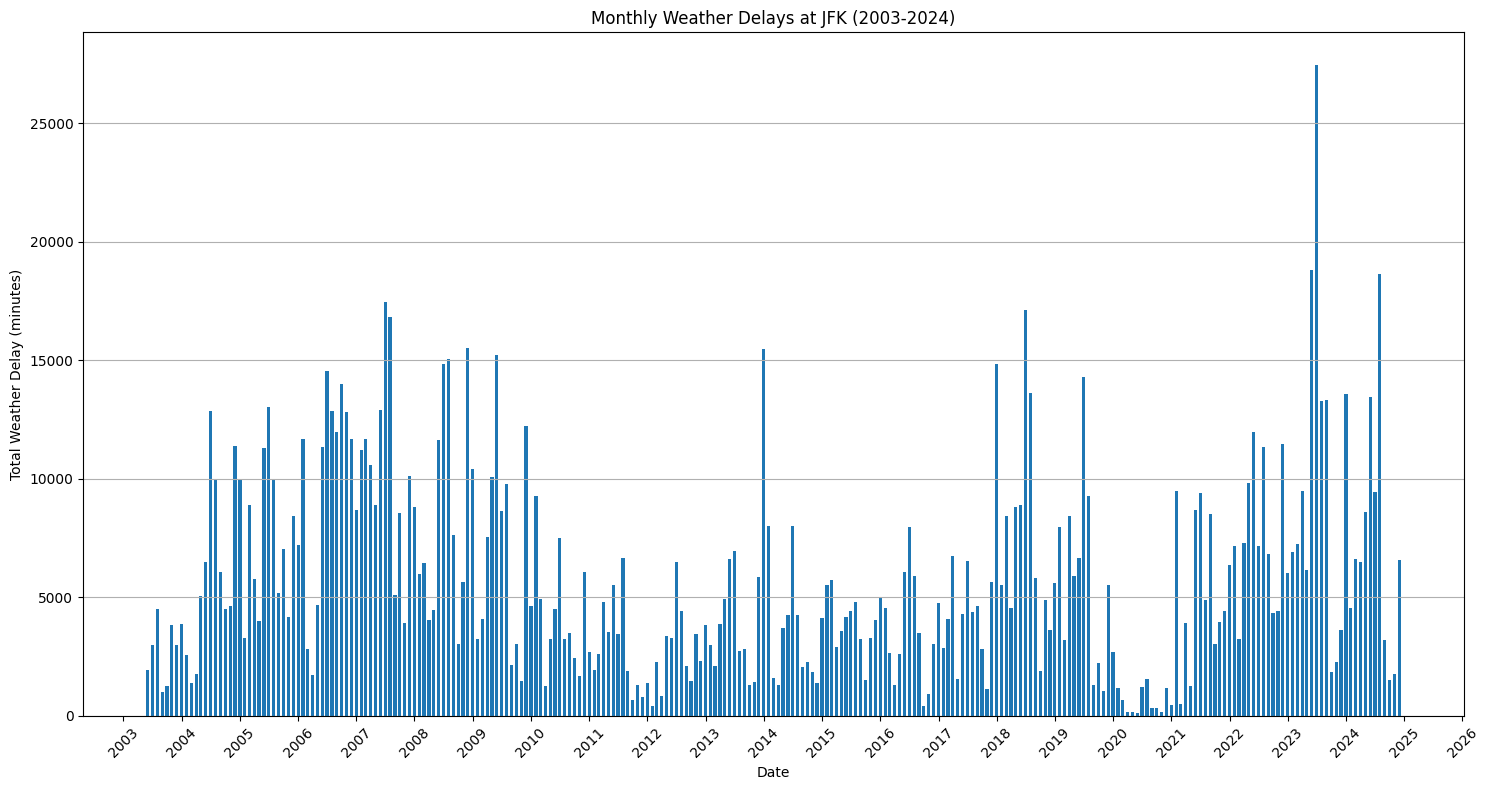

In [58]:
# histogram of monthly delays caused by weather across 21 years (June 2003 to Dec. 31 2024)
# group by year and month, summing weather_delay
monthly_weather = jfk_df.groupby(["year", "month"])["weather_delay"].sum().reset_index()

# create date column for x-axis
# make sure 'year' and 'month' are integers
monthly_weather["year"] = pd.to_numeric(monthly_weather["year"], errors="coerce")
monthly_weather["month"] = pd.to_numeric(monthly_weather["month"], errors="coerce")

# drop rows where year or month could not be converted (which are NaN)
monthly_weather = monthly_weather.dropna(subset=["year", "month"])

monthly_weather["date"] = pd.to_datetime(monthly_weather[["year", "month"]].assign(day=1))
monthly_weather = monthly_weather.sort_values("date")
print(monthly_weather)

# plot histogram
plt.figure(figsize=(15, 8))
plt.bar(monthly_weather["date"], monthly_weather["weather_delay"], width=20)
plt.title("Monthly Weather Delays at JFK (2003-2024)")
plt.xlabel("Date")
plt.ylabel("Total Weather Delay (minutes)")
# format the x-axis to show only every January
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

Jan: 32.81°F
Feb: 34.64°F
Mar: 41.26°F
Apr: 50.93°F
May: 60.48°F
Jun: 70.27°F
Jul: 76.33°F
Aug: 75.00°F
Sep: 68.43°F
Oct: 57.10°F
Nov: 46.90°F
Dec: 38.17°F


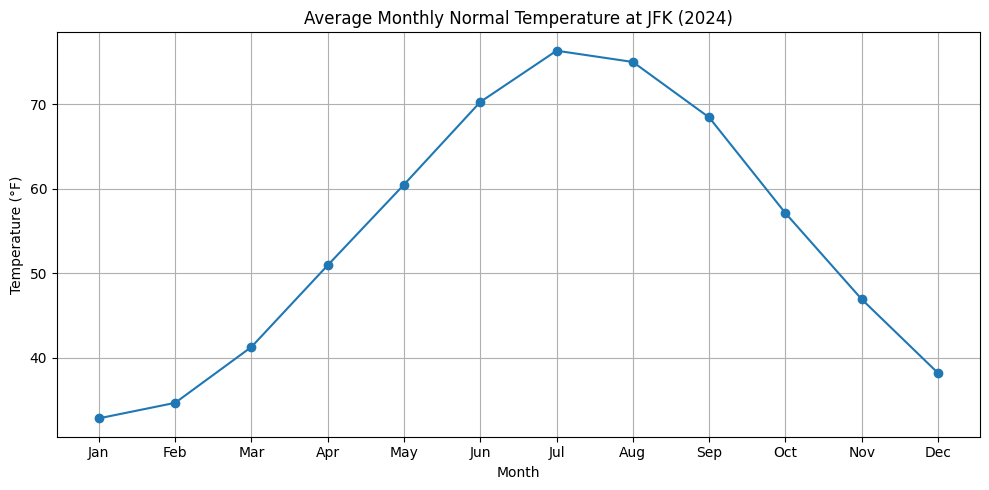

In [59]:
# average temperature across 12 months in 2024 from csv files
# month files mapping and create month labels
temp_folder = "../data/raw/raw data/JFKWeatherData"

month_files = {
    "jfkjan.csv": "Jan", "jfkfeb.csv": "Feb", "jfkmar.csv": "Mar", "jfkapr.csv": "Apr",
    "jfkmay.csv": "May", "jfkjun.csv": "Jun", "jfkjul.csv": "Jul", "jfkaug.csv": "Aug",
    "jfksep.csv": "Sep", "jfkoct.csv": "Oct", "jfknov.csv": "Nov", "jfkdec.csv": "Dec"
}

monthly_avg_temps = []
month_labels = []

for filename, month in month_files.items():
    file_path = os.path.join(temp_folder, filename)
    
    try:
        # read the file without header, skip first 5 rows of actual metadata
        df = pd.read_csv(file_path, header=None, skiprows=5)
        
        # column index 3 = "Normal Mean T."  Calculate average temp of all days in month
        mean_temps = pd.to_numeric(df.iloc[:, 3], errors="coerce")
        monthly_avg = mean_temps.mean()
        
        monthly_avg_temps.append(monthly_avg)
        month_labels.append(month)

        # print the average temeprature for this month
        print(f"{month}: {monthly_avg:.2f}°F")
        
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        monthly_avg_temps.append(None)
        month_labels.append(month)

# plot the graph
plt.figure(figsize=(10, 5))
plt.plot(month_labels, monthly_avg_temps, marker='o')
plt.title("Average Monthly Normal Temperature at JFK (2024)")
plt.xlabel("Month")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.tight_layout()
plt.show()

 Year month  precipitation       date
 2003   Jan           1.77 2003-01-01
 2003   Feb           4.48 2003-02-01
 2003   Mar           3.56 2003-03-01
 2003   Apr           3.14 2003-04-01
 2003   May           4.01 2003-05-01
 2003   Jun           9.23 2003-06-01
 2003   Jul           2.31 2003-07-01
 2003   Aug           2.28 2003-08-01
 2003   Sep           2.67 2003-09-01
 2003   Oct           3.42 2003-10-01
 2003   Nov           3.91 2003-11-01
 2003   Dec           3.99 2003-12-01
 2004   Jan           1.92 2004-01-01
 2004   Feb           2.22 2004-02-01
 2004   Mar           3.24 2004-03-01
 2004   Apr           5.50 2004-04-01
 2004   May           4.31 2004-05-01
 2004   Jun           3.05 2004-06-01
 2004   Jul           6.62 2004-07-01
 2004   Aug           7.36 2004-08-01
 2004   Sep           8.25 2004-09-01
 2004   Oct           1.26 2004-10-01
 2004   Nov           3.71 2004-11-01
 2004   Dec           3.51 2004-12-01
 2005   Jan           3.39 2005-01-01
 2005   Feb 

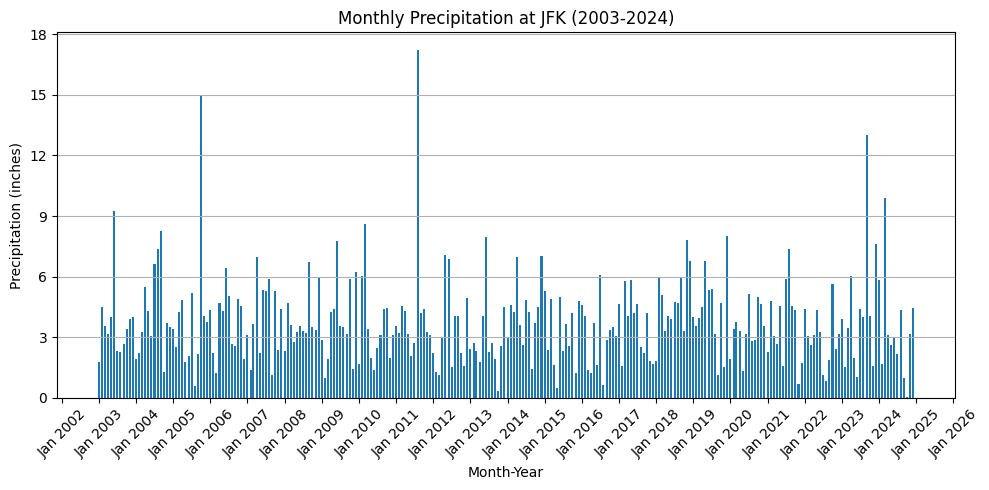

In [60]:
# visualization for total precipitation across all months in 21 years (2003 - 2024)
# load the file for precipitation
precip_path = "../data/raw/raw data/JFKWeatherData/monthly_total_precipitation21.csv"

# read the file without header
df = pd.read_csv(precip_path, skiprows=2)
# strip all column names to remove hidden characters
df.columns = df.columns.str.strip()
# drop the summary rows at the bottom. only keep year column
df = df[pd.to_numeric(df["Year"], errors="coerce").notna()]
# drop annual col since we want monthly data
if "Annual" in df.columns:
    df = df.drop(columns=["Annual"])

# Convert 'Year' column to int
df["Year"] = df["Year"].astype(int)

# convert wide to long format
precip_long = df.melt(id_vars=["Year"], 
                             var_name="month", 
                             value_name="precipitation")

# create the month labels
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
precip_long["month"] = pd.Categorical(precip_long["month"], categories=months, ordered=True)

# safely convert to datetime
precip_long = precip_long.dropna(subset=["Year", "month"])
precip_long["month_num"] = precip_long["month"].cat.codes + 1
precip_long["Year"] = precip_long["Year"].astype(int)
precip_long["month_num"] = precip_long["month_num"].astype(int)
precip_long["precipitation"] = pd.to_numeric(precip_long["precipitation"], errors="coerce")

precip_long["date"] = pd.to_datetime({
    "year": precip_long["Year"],
    "month": precip_long["month_num"],
    "day": 1
})

print(precip_long[["Year", "month", "precipitation", "date"]].sort_values("date").to_string(index=False))

# plot the graph
plt.figure(figsize=(10, 5))
plt.bar(precip_long["date"], precip_long["precipitation"], width=20)
plt.title("Monthly Precipitation at JFK (2003-2024)")
plt.xlabel("Month-Year")
plt.ylabel("Precipitation (inches)")
# set cleaner y-axis
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=7))
plt.grid(axis='y')
# make x-axis cleaner
ax.xaxis.set_major_locator(mdates.YearLocator()) 
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser" 

# 3d visualization for storm events that occurred from 2003 to 2024
cols_to_use = [
    "BEGIN_DATE", "EVENT_TYPE", "STATE_ABBR", "CZ_NAME_STR",
    "BEGIN_TIME", "MAGNITUDE"  
]
# load the storm data file from NOAA for Queens County (where JFK is located)
storm_path = "../data/raw/raw data/JFKWeatherData/storm_data_search_results21.csv"
# read the csv file
# Use engine="python" to tolerate irregular spacing, and only load safe columns
storm_df = pd.read_csv(
    storm_path,
    usecols=cols_to_use,
    engine="python",
    encoding="utf-8",
    on_bad_lines="skip"  # skips problematic lines instead of crashing
)

# convert BEGIN_DATE to datetime
storm_df["BEGIN_DATE"] = pd.to_datetime(storm_df["BEGIN_DATE"], errors="coerce")
# extract the month number (1-12)
storm_df["year"] = storm_df["BEGIN_DATE"].dt.year
storm_df["month"] = storm_df["BEGIN_DATE"].dt.month

# filter relevant storm types
relevant_types = ["Blizzard", "Coastal Flood", "Dense Fog", "Flash Flood", "Flood",
    "Hail", "Heavy Rain", "Heavy Snow", "High Wind", "Hurricane (Typhoon)",
    "Ice Storm", "Lightning", "Strong Wind", "Thunderstorm Wind", "Tornado",
    "Tropical Depression", "Tropical Storm", "Winter Storm", "Winter Weather",
    "Excessive Heat", "Extreme Cold/Wind Chill", "Storm Surge/Tide", "Wildfire"]
storm_df = storm_df[storm_df["EVENT_TYPE"].isin(relevant_types)]

# create a formatted month label with month, year
storm_df["month_year"] = storm_df["BEGIN_DATE"].dt.strftime("%b %Y")
# count by month_year and event type
event_counts = storm_df.groupby(["month_year", "EVENT_TYPE"]).size().reset_index(name="count")

# sort month_year chronologically for x axis
event_counts["month_year"] = pd.to_datetime(event_counts["month_year"], format="%b %Y")
event_counts = event_counts.sort_values("month_year")
event_counts["month_year_str"] = event_counts["month_year"].dt.strftime("%b %Y")

print(event_counts[["month_year_str", "EVENT_TYPE", "count"]].to_string(index=False))

# create 3d scatter plot
fig = px.scatter_3d(
    event_counts,
    x="month_year_str",         # numerical month for axis ordering
    y="EVENT_TYPE",             # categorical event type
    z="count",                  # height = count of events
    color="EVENT_TYPE",         # color by event type
    size="count",               # bubble size = # events
    text="count",               # show value on hover
    labels={
        "month_year_str": "Month-Year",
        "EVENT_TYPE": "Event Type",
        "count": "Event Count"
    },
    title="Monthly Storm Events by Type in Queens (2003-2024)"
)
fig.show()


month_year_str        EVENT_TYPE  count
      Jun 2003 Thunderstorm Wind      1
      Jul 2003       Flash Flood      1
      Aug 2003       Flash Flood      1
      Sep 2003       Flash Flood      1
      Jun 2004       Flash Flood      2
      Jul 2004       Flash Flood      1
      Jul 2004        Heavy Rain      1
      Aug 2004              Hail      1
      Aug 2004         Lightning      1
      Aug 2004       Flash Flood      4
      Sep 2004       Flash Flood      4
      Mar 2005        Heavy Rain      1
      Apr 2005        Heavy Rain      1
      May 2005 Thunderstorm Wind      1
      Aug 2005 Thunderstorm Wind      1
      Oct 2005       Flash Flood      1
      Jun 2006       Flash Flood      1
      Jun 2006              Hail      1
      Jul 2006 Thunderstorm Wind      4
      Jul 2006       Flash Flood      1
      Jul 2006         Lightning      1
      Aug 2006       Flash Flood      2
      Sep 2006 Thunderstorm Wind      1
      Apr 2007             Flood      1
